This notebook is the starting point of this project. It is the EDA and modification for the Global Power Plant Database (GPPD) from the World Resources Institute (WRI).

It is assumed that the csv is already downloaded and located in `data/raw` with the name `global_power_plant_database.csv`

In [1]:
import pyhere
import sys
sys.path.insert(0, str(pyhere.here().resolve().joinpath("src")))
import utils

import numpy as np
import pandas as pd
import pyhere
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [4]:
columns_to_use = ['capacity_mw', 
            'latitude', 
            'longitude', 
            'primary_fuel', 
            'country_long', 
        #    'commissioning_year', 
        #    'year_of_capacity_data'#, 
        #    'other_fuel1', 
        #    'other_fuel2', 
        #    'other_fuel3', 
            'generation_gwh_2013',
           'generation_gwh_2014', 
           'generation_gwh_2015', 
           'generation_gwh_2016', 
           'generation_gwh_2017', 
           'generation_gwh_2018', 
           'generation_gwh_2019', 
        #    'generation_data_source'
        ]
df_power_plants = pd.read_csv(utils.DIR_DATA_RAW/"global_power_plant_database.csv", usecols=columns_to_use, engine='python')

In [5]:
df_power_plants.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_power_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         34936 non-null  object 
 1   capacity_mw          34936 non-null  float64
 2   latitude             34936 non-null  float64
 3   longitude            34936 non-null  float64
 4   primary_fuel         34936 non-null  object 
 5   generation_gwh_2013  6417 non-null   float64
 6   generation_gwh_2014  7226 non-null   float64
 7   generation_gwh_2015  8203 non-null   float64
 8   generation_gwh_2016  9144 non-null   float64
 9   generation_gwh_2017  9500 non-null   float64
 10  generation_gwh_2018  9637 non-null   float64
 11  generation_gwh_2019  9659 non-null   float64
dtypes: float64(10), object(2)
memory usage: 3.2+ MB


How many plants are registered in the same latitude and longitude?

In [19]:
df_power_plants.loc[(df_power_plants['primary_fuel'] == 'Solar') | (df_power_plants['primary_fuel'] == 'Wind') ]

,country_long,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
1,Afghanistan,10.0,31.6700,65.795,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,10.0,31.6230,65.792,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Algeria,20.0,27.9080,-0.317,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Algeria,20.0,35.8800,5.475,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Algeria,20.0,34.5320,0.804,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34894,Vietnam,48.0,16.4400,107.505,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34895,Vietnam,204.0,11.7000,109.030,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34896,Vietnam,32.0,11.0525,108.410,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34901,Vietnam,30.0,11.2122,108.200,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
locations = df_power_plants.groupby(['latitude', 'longitude'])['capacity_mw'].value_counts().sort_values(ascending=False).loc[lambda x : x>1]
print(f'{locations.count()} locations that have more than 1 plant')
print(f'{locations.sum()} total plants in those {locations.count()} ')
print(f'{locations.sum() - locations.count()} total plants that could be cataloged as \"duplicated\" ')

118 locations that have more than 1 plant
269 total plants in those 118 
151 total plants that could be cataloged as "duplicated" 


There is no guarantee that the "duplicated" plants are really that. Also, considering the total number of rows (35000) it doesn't represent a significantly number to affect the calculations. And even in the subsequently notebooks when balancing the data, each class will take around 4600 samples; thus, considering the worst case scenario that the duplicated would be all of the same class, it only represents around 3%. 

I've decided to keep them.

In [8]:
df_power_plants[['capacity_mw']].value_counts().sort_index(ascending=False)

capacity_mw
22500.00000      1
13050.00000      1
12600.00000      1
8865.00000       1
8851.00000       1
              ... 
1.00209          1
1.00150          1
1.00080          1
1.00009          1
1.00000        932
Length: 5611, dtype: int64

In [11]:
df_power_plants.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,34936.000000,34936.000000,34936.000000,34936,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000
unique,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,10665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,163.355148,32.816637,-6.972803,NaN,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436
std,489.636072,22.638603,78.405850,NaN,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485
min,1.000000,-77.847000,-179.977700,NaN,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000
25%,4.900000,29.256475,-77.641550,NaN,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500
50%,16.745000,39.727750,-2.127100,NaN,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000
75%,75.344250,46.263125,49.502675,NaN,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498


In [12]:
df_power_plants['capacity_mw'].isna().sum()

0

# GROUPING THE TARGET INTO WIND, SOLAR AND OTHER

<AxesSubplot:xlabel='primary_fuel'>

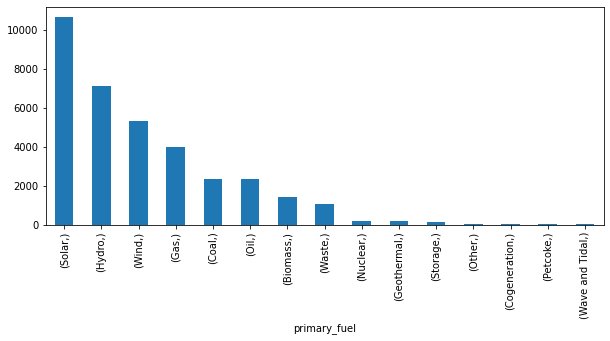

In [36]:
plt.figure(figsize=(10,4))
df_power_plants[['primary_fuel']].value_counts().plot.bar()

In [37]:
df_power_plants['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [38]:
mapping = {
            'Gas': 'Other', 
            'Oil': 'Other', 
            'Hydro': 'Other', 
            'Coal': 'Other', 
            'Biomass': 'Other', 
            'Waste': 'Other',
            'Cogeneration': 'Other', 
            'Geothermal': 'Other', 
            'Petcoke': 'Other', 
            'Nuclear': 'Other', 
            'Other': 'Other',
            'Storage': 'Other',
            'Solar': 'Solar',
            'Wind': 'Wind'
            }

In [39]:
df_power_plants['primary_fuel_transformed'] = df_power_plants['primary_fuel'].map(mapping)

In [40]:
df_power_plants[['primary_fuel', 'primary_fuel_transformed']].sample(20)

,primary_fuel,primary_fuel_transformed
22770,Solar,Solar
22324,Wind,Wind
26340,Wind,Wind
14172,Coal,Other
4330,Hydro,Other
27864,Solar,Solar
28555,Solar,Solar
34731,Hydro,Other
20413,Hydro,Other
24039,Solar,Solar


In [41]:
df_power_plants.drop(columns=['primary_fuel'], inplace=True)

<AxesSubplot:xlabel='primary_fuel_transformed'>

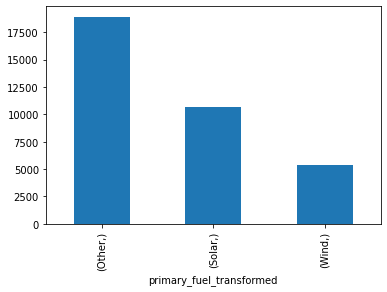

In [42]:
df_power_plants[['primary_fuel_transformed']].value_counts().plot.bar()

In [43]:
df_power_plants[['primary_fuel_transformed']]

,primary_fuel_transformed
0,Other
1,Solar
2,Solar
3,Other
4,Other
...,...
34931,Other
34932,Other
34933,Other
34934,Other


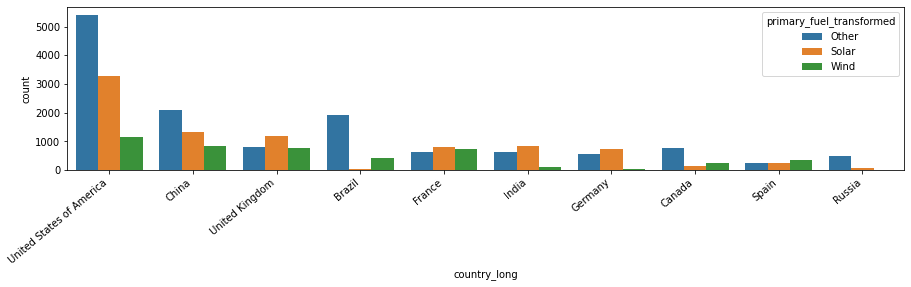

In [65]:
# df_solar_wind[['country_long', 'primary_fuel']].groupby(['country_long', 'primary_fuel']).value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,3))
ax = sns.countplot(data=df_power_plants, x='country_long', hue='primary_fuel_transformed', order=df_power_plants['country_long'].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
plt.show()

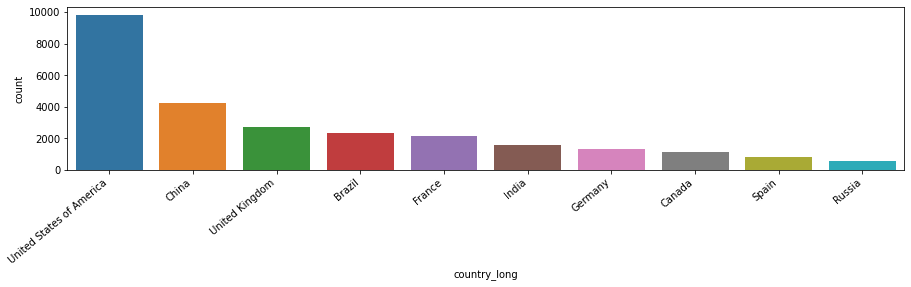

In [64]:
# df_solar_wind[['country_long', 'primary_fuel']].groupby(['country_long', 'primary_fuel']).value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(15,3))
ax = sns.countplot(data=df_power_plants, x='country_long', order=df_power_plants['country_long'].value_counts()[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
plt.show()

# EXPORTING THE MODIFIED DATA INTO A NEW "TRANSFORMED" DATASET

In [41]:
df_power_plants.to_csv(utils.DIR_DATA_INTERIM/"power_plants_with_generation_transformed.csv")

Next: `src/data/2-make_dataset.py` to get data from POWER NASA API